# Intro to Regression Analysis Workshop
*Created by Jack Douglas, UWaterloo Data Science Club*
<br>

**REMINDER: You can make a copy of this notebook by going to File > Save a copy in Drive**


---



## Summary

In this notebook, we will go over the implementations of linear regression, polynomial regression, and logistic regression using the scikit-learn library. If you are interested in the implementation from scratch, message me on the UWaterloo Data Science discord. 

The datasets used for each type of regression can be found in their respective section.


## Packages/Libraries

We are installing the NumPy library for doing computation with our matrices. As well, we are installing the Pandas library for handling our datasets. We are installing matlabplot.pyplot and seaborn for visualizations. Finally, we are importing the scikit-learn library for creating our regression models.

In [ ]:
# NumPy is a library used for numerical computing, particularly with arrays/matrices, and is very optimized
import numpy as np   
from numpy import argmax

# Pandas is a library used for data analysis and manipulation (primarily with datasets)
import pandas as pd 

# matplotlib.pyplot is a state-based interface to matplotlib (seaborn is another library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns


# Scikit-learn is a machine learning library which supports classification, regression, and clustering algorithms 
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression # Linear Regression module
from sklearn.preprocessing import PolynomialFeatures # Polynomial Regression module
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LogisticRegression # Logistic Regression module
from sklearn.model_selection import train_test_split
from sklearn import metrics # Evaluation module

In [ ]:
from google.colab import drive # Mounting the Google Drive (this allows me to access files from my Google Drive in this notebook)
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Linear Regression

We are going to perform simple linear regression on the restaurant chain example from the slides. We first conduct some preprocessing on the data so that it is formatted correctly. Then, we will show the scikit-learn implementation and examine the results. Note that this implementation generalizes to multiple linear regression.



### Dataset Preprocessing

Dataset: https://drive.google.com/file/d/1C62AJSa-WF00XNgOaHvi_T9pFAofmZ5a/view?usp=sharing 


In [ ]:
# IMPORTANT: Change this pathway to wherever you store the restaurant.txt file
df_1 = pd.read_csv("/content/gdrive/MyDrive/UW/UW Data Science Club/Regression Analysis Workshop/datasets/restaurant.txt", sep=",")

df_1.head(10) # Useful method for looking at first several entries of dataset

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


**Note:** If you're dataset contains non-numerical values (ie. "yes" or "no"), you can use one-hot encoding to convert them into usable data for your machine learning models. Check out Pandas' get_dummies method or scikit-learn's OneHotEncoder module.

In [ ]:
df_1.describe() # Useful method for understanding dataset

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Population vs. Profit')

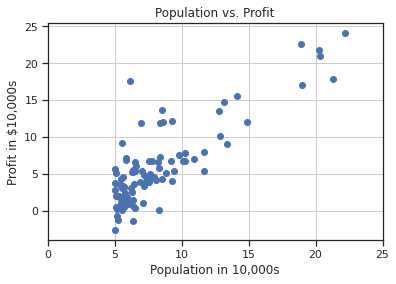

In [ ]:
# Plotting the dataset
plt.figure()
plt.scatter(df_1['Population'],df_1['Profit'])
plt.grid()
plt.xlabel("Population in 10,000s")
plt.xlim([0, 25])
plt.ylabel("Profit in $10,000s")
plt.title("Population vs. Profit")

In [ ]:
# Change our data from a Pandas dataframe into a NumPy array
y_1 = df_1['Profit']
y_1 = y_1.to_numpy().reshape(len(y_1),1) # Reshaping the data to a column vector
print("y: ")
print(y_1)

X_1 = df_1['Population']
X_1 = X_1.to_numpy().reshape(len(X_1),1) # Reshaping the data to a column vector
x0 = np.ones((len(X_1), 1)) # Adding our bias feature to the input data
X_1 = np.concatenate((x0,X_1),axis=1)
print("X: ")
print(X_1)

y: 
[[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.20421]
 [ 0.67861]


In [ ]:
# Splitting up the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1= train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### Implementation w/ scikit-learn

In [ ]:
# Fitting model
linreg = LinearRegression()
linreg.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Printing out parameters
print(linreg.intercept_[0]) # Theta_0 (ie. intercept)
print(linreg.coef_[0][1]) # Theta_1 (ie. slope)

-4.732397595806337
1.2875287587666573


Text(0.5, 1.0, 'scikit-learn: Population vs. Profit')

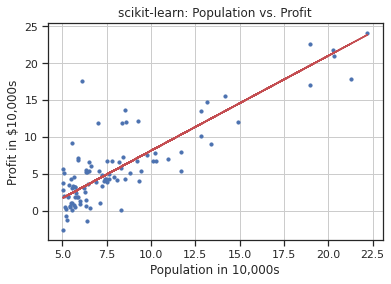

In [ ]:
# Predicting across entire dataset
y_pred_sklearn = linreg.predict(X_1)

# Plotting model overtop of data
plt.figure()
plt.scatter(X_1[:,1], y_1, s=10)
plt.plot(X_1[:,1], y_pred_sklearn, color='r')
plt.grid()
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("scikit-learn: Population vs. Profit")

### Evaluating linear regression models

In [ ]:
# Making predictions on test set
y_pred_1 = linreg.predict(X_test_1)

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test_1,y_pred_1))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test_1,y_pred_1))

15.709362447765187
3.9635038094803425
2.4849697479798403


# Polynomial Regression

We are going to perform polynomial regression on the fish dataset example from the slides. We first conduct some preprocessing on the data so that it is formatted correctly. Then, we will show the scikit-learn implementation and examine the results. Note that this implementation generalizes to polynomial regression with multiple variables.

### Dataset Preprocessing

Dataset: https://drive.google.com/file/d/1JMww_6UqSUeF2007v-JUbA0D5glyE2Sj/view?usp=sharing 

In [ ]:
# IMPORTANT: Change this pathway to wherever you store the fish.csv file
df_2 = pd.read_csv("/content/gdrive/MyDrive/UW/UW Data Science Club/Regression Analysis Workshop/datasets/fish.csv")

df_2.head() # Useful method for looking at first several entries of dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df_2.describe() # Useful method for understanding dataset

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Text(0.5, 1.0, 'Fish Width vs. Weight')

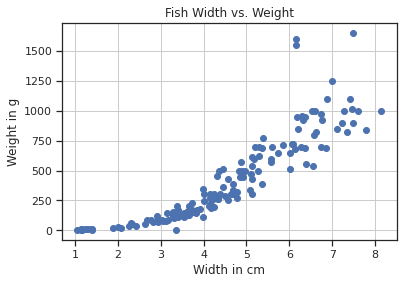

In [ ]:
# Plotting the dataset
plt.figure()
plt.scatter(df_2['Width'],df_2['Weight'])
plt.grid()
plt.xlabel("Width in cm")
plt.ylabel("Weight in g")
plt.title("Fish Width vs. Weight")

In [ ]:
# Change our data from a Pandas dataframe into a NumPy array
y_2 = df_2['Weight']
y_2 = y_2.to_numpy().reshape(len(y_2),1) # Reshaping the data to a column vector
print("y: ")
print(y_2)

X_2 = df_2['Width']
X_2 = X_2.to_numpy().reshape(len(X_2),1) # Reshaping the data to a column vector
x0 = np.ones((len(X_2), 1)) # Adding our bias feature to the input data
X_2 = np.concatenate((x0,X_2),axis=1)
print("X: ")
print(X_2)

y: 
[[ 242. ]
 [ 290. ]
 [ 340. ]
 [ 363. ]
 [ 430. ]
 [ 450. ]
 [ 500. ]
 [ 390. ]
 [ 450. ]
 [ 500. ]
 [ 475. ]
 [ 500. ]
 [ 500. ]
 [ 340. ]
 [ 600. ]
 [ 600. ]
 [ 700. ]
 [ 700. ]
 [ 610. ]
 [ 650. ]
 [ 575. ]
 [ 685. ]
 [ 620. ]
 [ 680. ]
 [ 700. ]
 [ 725. ]
 [ 720. ]
 [ 714. ]
 [ 850. ]
 [1000. ]
 [ 920. ]
 [ 955. ]
 [ 925. ]
 [ 975. ]
 [ 950. ]
 [  40. ]
 [  69. ]
 [  78. ]
 [  87. ]
 [ 120. ]
 [   0. ]
 [ 110. ]
 [ 120. ]
 [ 150. ]
 [ 145. ]
 [ 160. ]
 [ 140. ]
 [ 160. ]
 [ 169. ]
 [ 161. ]
 [ 200. ]
 [ 180. ]
 [ 290. ]
 [ 272. ]
 [ 390. ]
 [ 270. ]
 [ 270. ]
 [ 306. ]
 [ 540. ]
 [ 800. ]
 [1000. ]
 [  55. ]
 [  60. ]
 [  90. ]
 [ 120. ]
 [ 150. ]
 [ 140. ]
 [ 170. ]
 [ 145. ]
 [ 200. ]
 [ 273. ]
 [ 300. ]
 [   5.9]
 [  32. ]
 [  40. ]
 [  51.5]
 [  70. ]
 [ 100. ]
 [  78. ]
 [  80. ]
 [  85. ]
 [  85. ]
 [ 110. ]
 [ 115. ]
 [ 125. ]
 [ 130. ]
 [ 120. ]
 [ 120. ]
 [ 130. ]
 [ 135. ]
 [ 110. ]
 [ 130. ]
 [ 150. ]
 [ 145. ]
 [ 150. ]
 [ 170. ]
 [ 225. ]
 [ 145. ]
 [ 188. ]
 [ 180

In [ ]:
# Splitting up the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

### Implementation w/ scikit-learn

In [ ]:
# Getting polynomial features (from feature vector)
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train_2)

# Fitting the model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Fish Width vs. Weight')

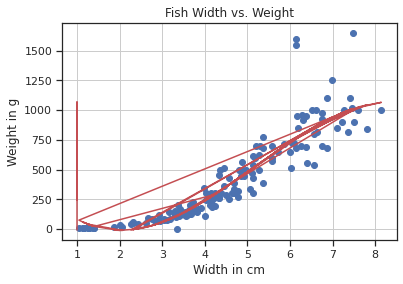

In [ ]:
# Predicting on entire dataset
X_poly_2 = poly_reg.fit_transform(X_2)
poly_pred = lin_reg_2.predict(X_poly_2)

plt.figure()
plt.scatter(df_2['Width'],df_2['Weight'])
plt.plot(X_2,poly_pred,color='r')
plt.plot()
plt.grid()
plt.xlabel("Width in cm")
plt.ylabel("Weight in g")
plt.title("Fish Width vs. Weight")

### Evaluating polynomial regression models


In [ ]:
# Making predictions on test set
X_poly_test = poly_reg.fit_transform(X_test_2)
poly_pred_test = lin_reg_2.predict(X_poly_test)

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test_2,poly_pred_test))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test_2,poly_pred_test)))

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test_2,poly_pred_test))

10024.232995969238
100.12109166389087
75.75362171335775


# Logistic Regression

We are going to perform logistic regression on the tumour example from the slides. We first conduct some preprocessing on the data so that it is formatted correctly. Then, we will show the scikit-learn implementation and examine the results. Note that this implementation generalizes to multinomial logistic regression.

### Dataset Preprocessing

Dataset: https://drive.google.com/file/d/1SKLl2FD4OYr_kSfGtmAQiDKr18p6CyKF/view?usp=sharing

In [ ]:
# IMPORTANT: Change this pathway to wherever you store the insurance.csv file
df_3 = pd.read_csv("/content/gdrive/MyDrive/UW/UW Data Science Club/Regression Analysis Workshop/datasets/wdbc.data.csv")

df_3.head() # Useful method for looking at first several entries of dataset

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Radius,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_points,W_Symmetry,W_fractal_dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df_3.describe() # Useful method for understanding dataset

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Radius,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_points,W_Symmetry,W_fractal_dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


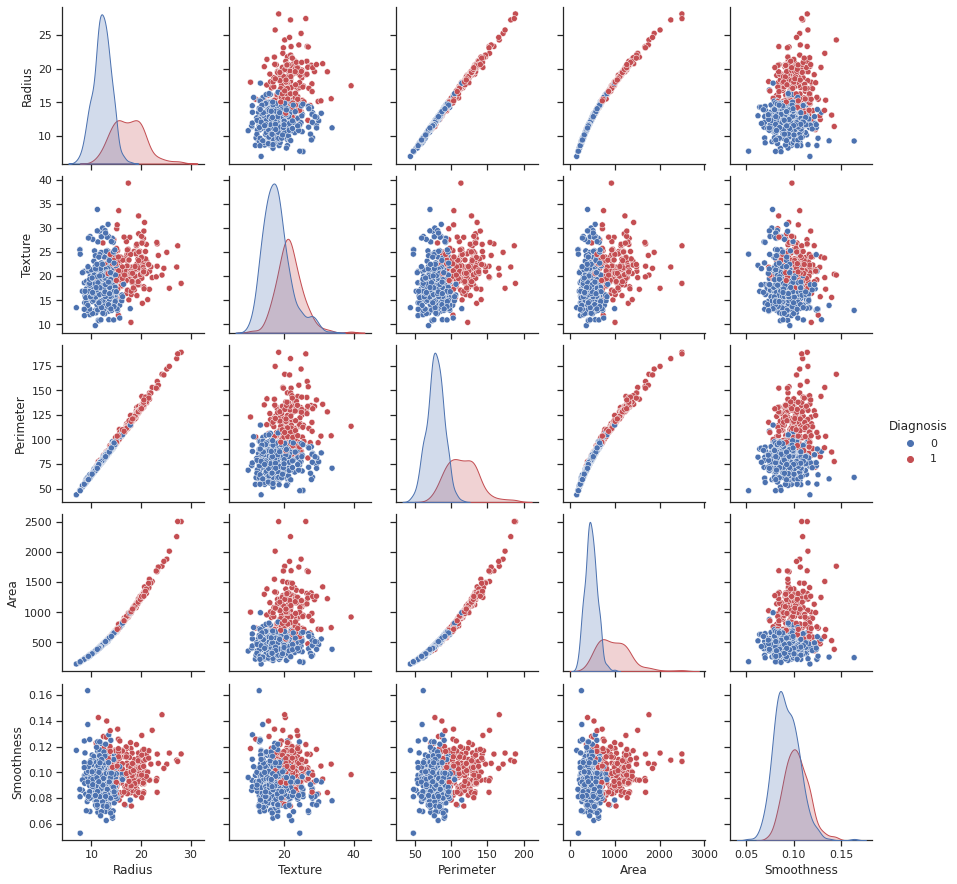

In [ ]:
# Useful seaborn tool to plot several features against each other
sns.set(style="ticks")
sns.pairplot(df_3, x_vars=['Radius','Texture','Perimeter','Area','Smoothness'], y_vars=['Radius','Texture','Perimeter','Area','Smoothness'], palette = ('b', 'r'), hue="Diagnosis", height=2.5)
plt.show()

Text(0.5, 1.0, 'Radius vs. Texture of Tumours')

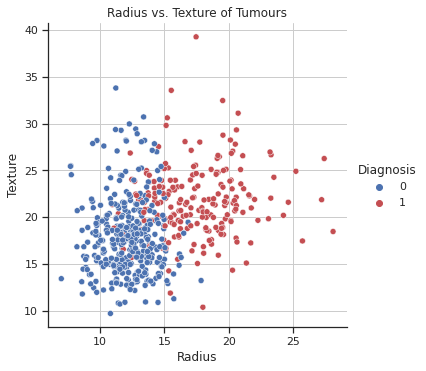

In [ ]:
# Useful seaborn tool to plot several features against each other
sns.set(style="ticks")
sns.pairplot(df_3, x_vars=['Radius'], y_vars=['Texture'], palette = ('b', 'r'), hue="Diagnosis", height=5)
plt.grid()
plt.title("Radius vs. Texture of Tumours")

In [ ]:
# Preparing data for splitting
X_3 = df_3[['Radius', 'Texture']]
y_3 = df_3['Diagnosis']

# Splitting up the data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.33, random_state=42)

### Implementation w/ scikit-learn

In [ ]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_3,y_train_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluating logistic regression models


In [ ]:
y_pred_3 = logreg.predict(X_test_3)

# Measuring the accuracy (range between 0 and 1)
accuracy = metrics.accuracy_score(y_test_3, y_pred_3)
print(accuracy)

# Measuring precision (range between 0 and 1)
precision = metrics.precision_score(y_test_3, y_pred_3, average='binary')
print(precision)

# Measuring recall (range between 0 and 1)
recall = metrics.recall_score(y_test_3, y_pred_3, average='binary')
print(recall)

0.9148936170212766
0.9047619047619048
0.8507462686567164
